In [38]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [39]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

--2020-09-29 09:13:50--  https://docs.google.com/uc?export=download&confirm=U7iO&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq
Resolving docs.google.com (docs.google.com)... 108.177.98.101, 108.177.98.139, 108.177.98.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-28-docs.googleusercontent.com/docs/securesc/jp5auboibqqla4fo8a045hho3f5qk8vu/n7949j0vipe038tqakga4uc7jhqafs07/1601370825000/17242455652310080862/00108366148864810110Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download [following]
--2020-09-29 09:13:50--  https://doc-0g-28-docs.googleusercontent.com/docs/securesc/jp5auboibqqla4fo8a045hho3f5qk8vu/n7949j0vipe038tqakga4uc7jhqafs07/1601370825000/17242455652310080862/00108366148864810110Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download
Resolving doc-0g-28-docs.googleusercontent.com (doc-0g-28-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting

In [41]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [44]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [45]:
X_train.shape

(34799, 32, 32, 3)

In [46]:
y_train.shape

(34799,)

In [47]:
X_validation.shape

(4410, 32, 32, 3)

In [48]:
y_validation.shape

(4410,)

In [49]:
y_test.shape

(12630,)

# TASK #3: PERFROM IMAGES VISUALIZATION


28

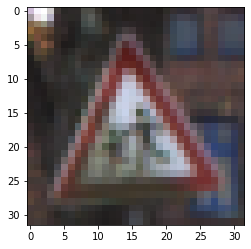

In [50]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

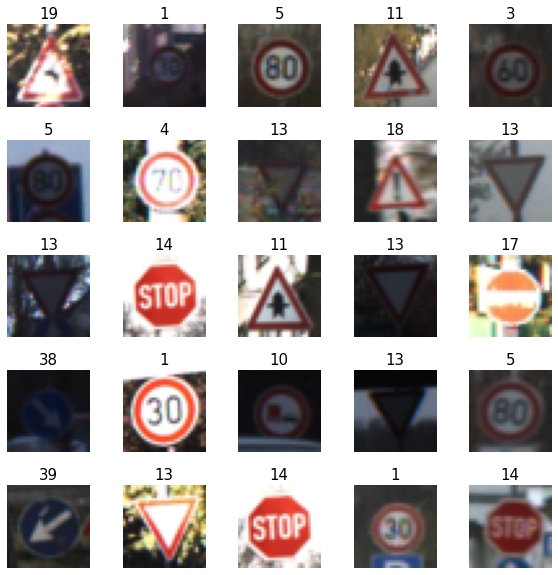

In [51]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [52]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Since its an RGB image, so it means that you have add r with g with b and then divide it by 3 to get your desired grayscale image. Its done in this way. If you have an color image like the image shown above and you want to convert it into grayscale using average method.

In [53]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [54]:
X_train_gray.shape


(34799, 32, 32, 1)

In [55]:
X_test_gray.shape


(12630, 32, 32, 1)

In [56]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [57]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

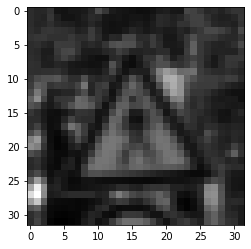

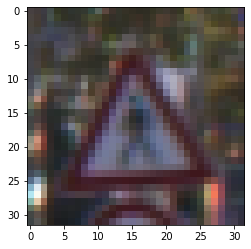

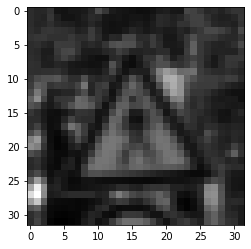

In [58]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')


#Building the model

Use this space for coding

Now I updated whole new dataset for Training, Test and Validation

In [59]:
print("Training Dataset Shape :",X_train_gray_norm.shape, y_train.shape)
print("Test Dataset Shape :",X_test_gray_norm.shape, y_test.shape)
print("Validation Dataset Shape :",X_validation_gray_norm.shape, y_validation.shape)

Training Dataset Shape : (34799, 32, 32, 1) (34799,)
Test Dataset Shape : (12630, 32, 32, 1) (12630,)
Validation Dataset Shape : (4410, 32, 32, 1) (4410,)


In [68]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_validation = to_categorical(y_validation, 43)
y_test = to_categorical(y_test, 43)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


shubham = Sequential()

shubham.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', 
                   input_shape=X_train_gray_norm.shape[1:]))
shubham.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
shubham.add(MaxPool2D(pool_size=(2, 2)))
shubham.add(Dropout(rate=0.25))
shubham.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
shubham.add(MaxPool2D(pool_size=(2, 2)))
shubham.add(Dropout(rate=0.25))
shubham.add(Flatten())
shubham.add(Dense(256, activation='relu'))
shubham.add(Dropout(rate=0.5))
shubham.add(Dense(43, activation='softmax'))

#Compilation of the shubham model
shubham.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)



In [70]:
#using 40 epochs for the training and saving the accuracy for each epoch
epochs = 40
history = shubham.fit(X_train_gray_norm, y_train, batch_size=32, epochs=epochs,
validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/40
1088/1088 [==============================] - 5s 5ms/step - loss: 0.9152 - accuracy: 0.7460 - val_loss: 0.1750 - val_accuracy: 0.9460
Epoch 2/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.1698 - accuracy: 0.9486 - val_loss: 0.0954 - val_accuracy: 0.9746
Epoch 3/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.1092 - accuracy: 0.9671 - val_loss: 0.0839 - val_accuracy: 0.9753
Epoch 4/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0843 - accuracy: 0.9730 - val_loss: 0.0635 - val_accuracy: 0.9839
Epoch 5/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0674 - accuracy: 0.9802 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 6/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0808 - val_accuracy: 0.9778
Epoch 7/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0940 - val_accuracy:

In [71]:
shubham.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [72]:
import matplotlib.pyplot as plt

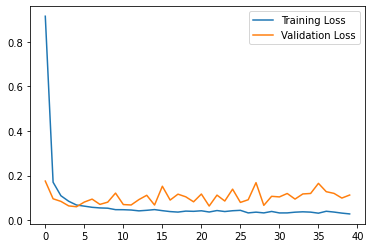

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

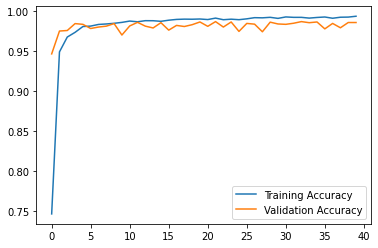

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [76]:
score = shubham.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.2079 - accuracy: 0.9749
Test Accuracy: 0.974901020526886


# #Attach a screen shot of your results as proof below this cell

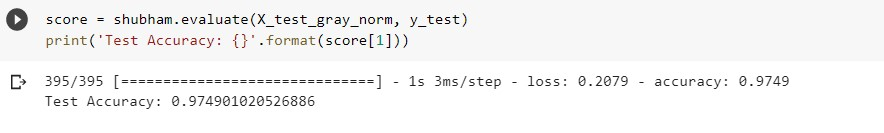

#Other helper functions


In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [78]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

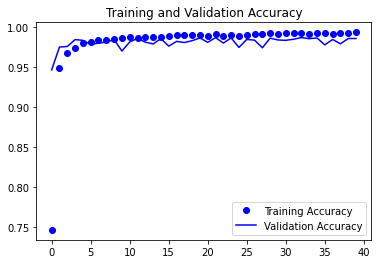

In [79]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

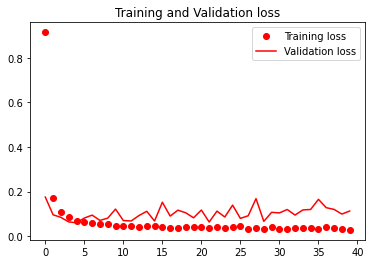

In [80]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [81]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

1

In [82]:
predict_class = shubham.predict_classes(X_test_gray_norm)

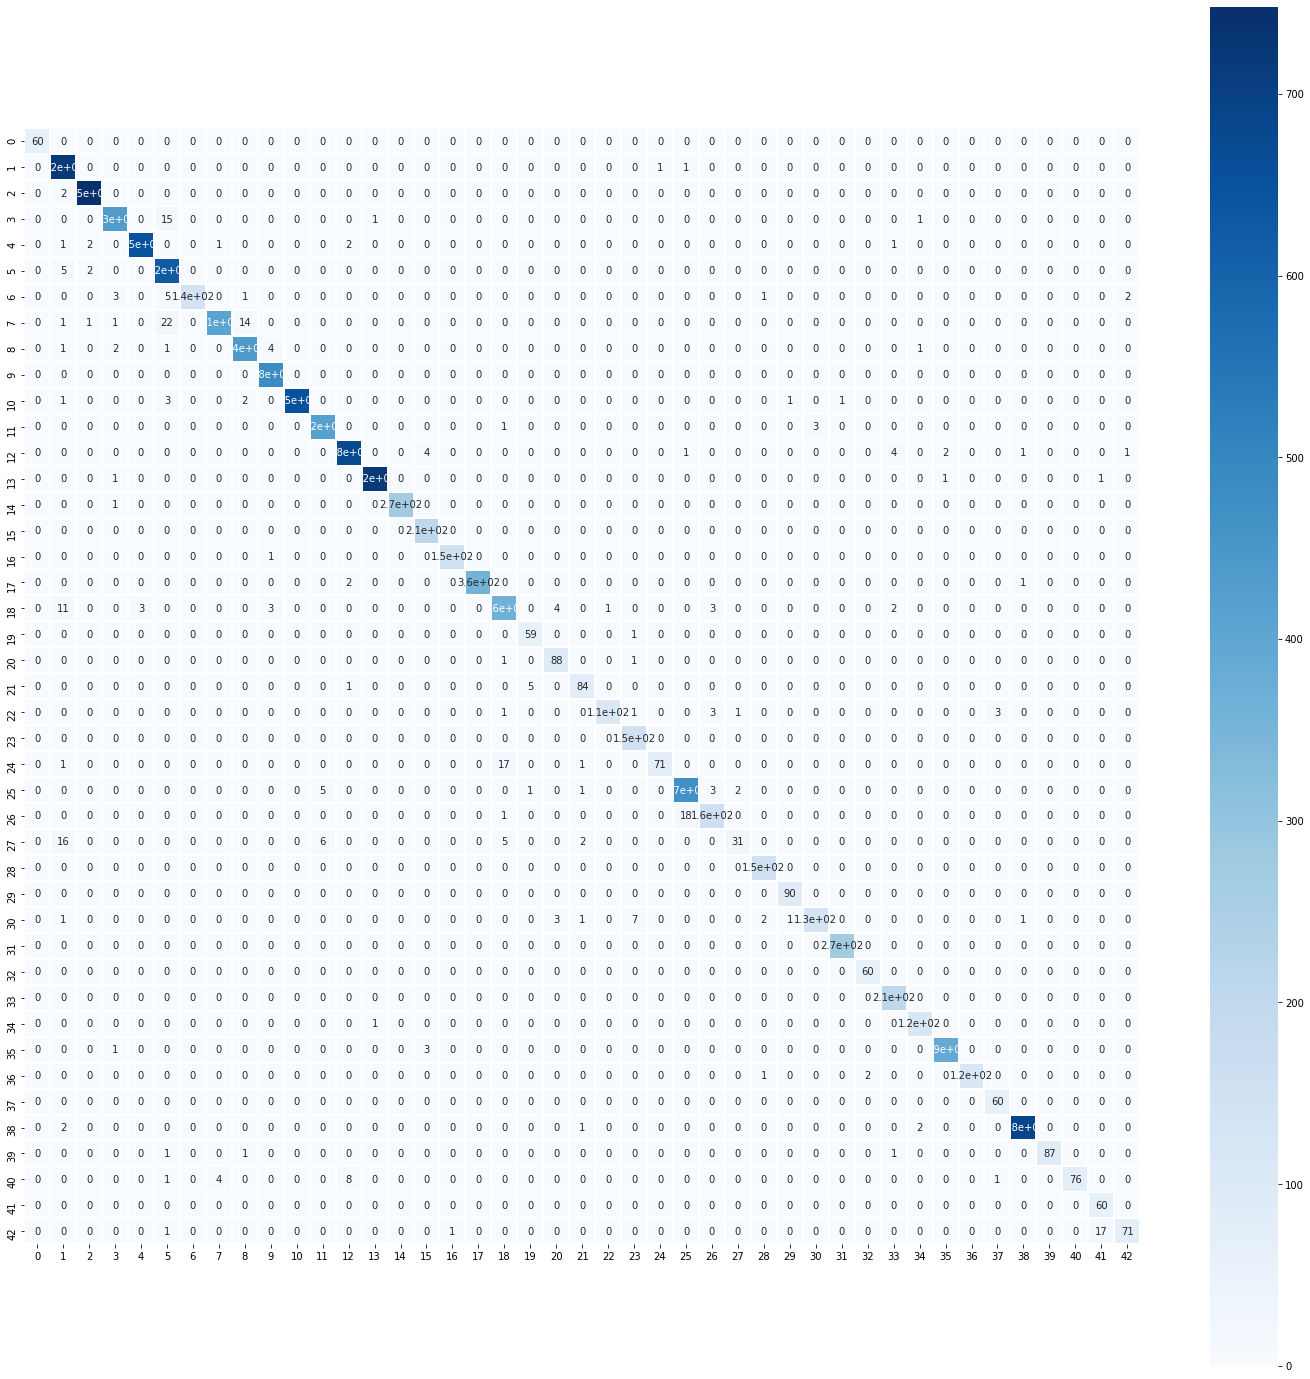

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(25, 25))
cm = confusion_matrix(rounded_labels, predict_class)
hm = sns.heatmap(cm, annot=True, square=True, linewidths=1, cmap='Blues')
plt.show(hm)

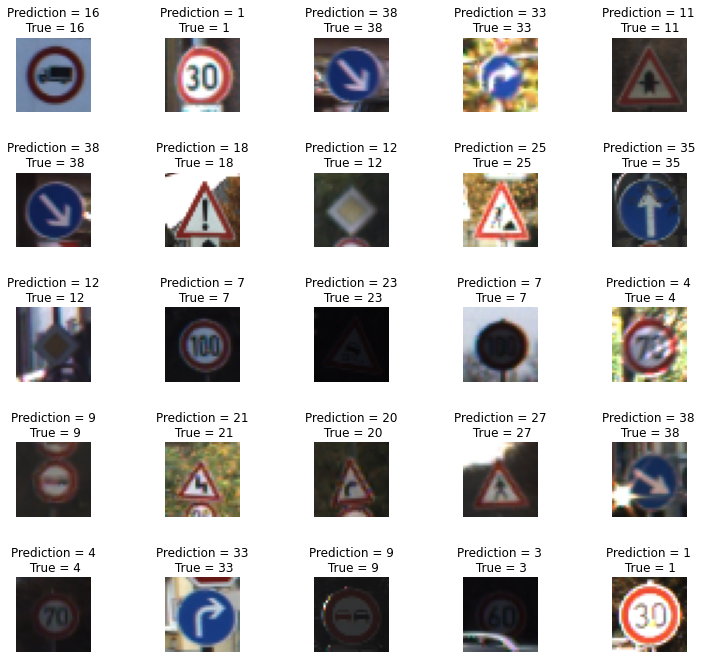

In [89]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predict_class[i], rounded_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    